Data analysis with python


In [5]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

In [8]:
#download the data and stor in dataframe
amzn = yf.download("amzn", start="2010-01-01", end= "2011-01-01")


[*********************100%***********************]  1 of 1 completed


In [9]:
#lets look at data
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,6.8125,6.8305,6.6570,6.6950,6.6950,151998000
2010-01-05,6.6715,6.7740,6.5905,6.7345,6.7345,177038000
2010-01-06,6.7300,6.7365,6.5825,6.6125,6.6125,143576000
2010-01-07,6.6005,6.6160,6.4400,6.5000,6.5000,220604000
2010-01-08,6.5280,6.6840,6.4515,6.6760,6.6760,196610000


In [10]:
#get data we are intersted in
amzn_close =  amzn.Close

In [11]:
amzn_close

Date
2010-01-04    6.6950
2010-01-05    6.7345
2010-01-06    6.6125
2010-01-07    6.5000
2010-01-08    6.6760
               ...  
2010-12-27    9.1070
2010-12-28    9.0545
2010-12-29    9.1685
2010-12-30    9.1375
2010-12-31    9.0000
Name: Close, Length: 252, dtype: float64

In [12]:
type(amzn.head())

pandas.core.frame.DataFrame

In [13]:
#amazon pecent range
amzn_percent_change = np.log(amzn_close/amzn_close.shift(1)) *100

In [14]:
amzn_percent_change

Date
2010-01-04         NaN
2010-01-05    0.588255
2010-01-06   -1.828173
2010-01-07   -1.715965
2010-01-08    2.671685
                ...   
2010-12-27   -0.246758
2010-12-28   -0.578156
2010-12-29    1.251186
2010-12-30   -0.338689
2010-12-31   -1.516223
Name: Close, Length: 252, dtype: float64

In [15]:
#stats

amzn_percent_change.describe()

count    251.000000
mean       0.117874
std        2.059495
min       -8.122476
25%       -1.004765
50%        0.047289
75%        1.293710
max        5.955434
Name: Close, dtype: float64

In [16]:
from scipy import stats
stats.describe(amzn_percent_change[1:])

DescribeResult(nobs=251, minmax=(-8.122475863789838, 5.955434458794229), mean=0.1178739332879876, variance=4.2415201962082705, skewness=-0.08451686390167833, kurtosis=1.1108885379602427)

In [17]:
#random numbers
x = np.random.normal(.1064, 1.948, 252)
stats.describe(x)

DescribeResult(nobs=252, minmax=(-5.946928729179084, 4.852970580428512), mean=0.11979758033235022, variance=3.5139746940975387, skewness=-0.36895604138141486, kurtosis=0.27901415165653987)

In [18]:
print("x:", stats.kurtosistest(x))
print("amzn", stats.kurtosistest(amzn_percent_change[1:]))

x: KurtosistestResult(statistic=1.049931893583976, pvalue=0.293749426768834)
amzn KurtosistestResult(statistic=2.7399955810555205, pvalue=0.0061440010423531)


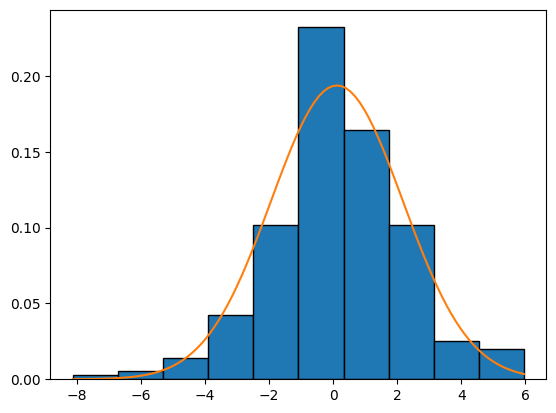

In [19]:
#plot histogram changes with normal curve

import matplotlib.mlab as mlab
from scipy.stats import norm
plt.hist(amzn_percent_change, edgecolor="black",density=True)

#overlay normal curve

mean = float(np.mean(amzn_percent_change))
sd = float(np.std(amzn_percent_change, ddof=1))
min_chng = float(np.min(amzn_percent_change))
max_chng = float(np.max(amzn_percent_change))
a = np.linspace(min_chng, max_chng, 100)

plt.plot(a, norm.pdf(a,mean,sd))


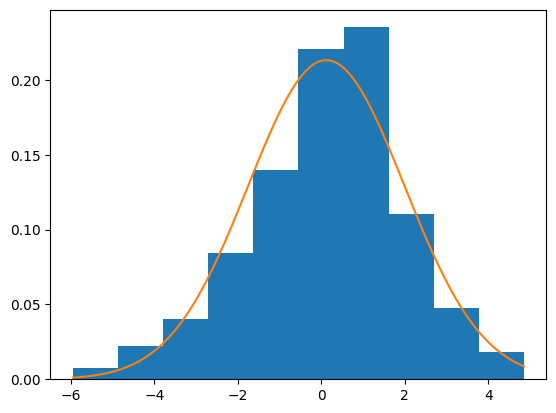

In [20]:
plt.hist(x,density=True)
mean = float(np.mean(x))
sd = float(np.std(x))
b = np.linspace(np.min(x), np.max(x), 100)
plt.plot(b, norm.pdf(b, mean, sd))
plt.show()

Monte Carlo Simulation of S&P500 investments

In [21]:
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, "")

'en_GB.UTF-8'

In [22]:
#traditional saving calculator

pv = 10000
time_horizon = 30
i = .07
additions = 10000

for years in range(time_horizon):
  ending = pv*(1+i) + additions
  print(locale.currency(ending, grouping=True))
  pv = ending




£20,700.00
£32,149.00
£44,399.43
£57,507.39
£71,532.91
£86,540.21
£102,598.03
£119,779.89
£138,164.48
£157,835.99
£178,884.51
£201,406.43
£225,504.88
£251,290.22
£278,880.54
£308,402.17
£339,990.33
£373,789.65
£409,954.92
£448,651.77
£490,057.39
£534,361.41
£581,766.71
£632,490.38
£686,764.70
£744,838.23
£806,976.91
£873,465.29
£944,607.86
£1,020,730.41


In [23]:
pv = 10000
ecxpected_return = 0.9
volatility = .18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for years in range(time_horizon):
  merket_return = np.random.normal(ecxpected_return, volatility)
  fv = pv*(1+merket_return) + annual_addition
  print("\t{}".ljust(10).format(round(merket_return,4)), "\t{}".rjust(10).format(locale.currency(fv,grouping=True)))
  pv = fv



	Return     		Ending Value
	0.948               	£29,480.29
	0.8466               	£64,439.64
	1.0977               	£145,177.51
	1.1279               	£318,917.03
	1.1196               	£685,981.68
	1.0727               	£1,431,863.71
	0.7368               	£2,496,821.39
	0.8242               	£4,564,703.94
	0.6716               	£7,640,347.94
	0.7867               	£13,661,182.10
	0.9744               	£26,982,820.35
	0.8248               	£49,248,392.15
	1.2025               	£108,477,924.38
	1.0564               	£223,087,280.31
	0.862               	£415,403,761.45
	0.7395               	£722,605,827.04
	0.8419               	£1,330,969,219.25
	1.0823               	£2,771,515,186.79
	0.9827               	£5,494,988,490.59
	0.5698               	£8,626,169,376.70
	0.9283               	£16,634,066,063.38
	1.2941               	£38,160,362,860.99
	0.9473               	£74,308,252,095.10
	0.5838               	£117,687,181,700.97
	0.7955               	£211,306,902,801.92
	0.6549 

In [24]:
#simulate portfollio ending amrket values

sim= DataFrame()
iterations = 5000

for x in range(iterations):
  expected_return = .09
  volatility = .18
  time_horizon = 30
  pv = 10000
  annual_investment = 10000
  stream = []
  for i in range(time_horizon):
    end = round(pv*(1 + np.random.normal(expected_return, volatility)) + annual_investment, 2)
    stream.append(end)
    pv = end

  sim[x] = stream

/tmp/ipykernel_2755972/1784230854.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sim[x] = stream


In [25]:
#firstfive annual ending values
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,22765.43,18884.66,21067.07,22868.29,19332.70
1,39185.21,29139.45,31956.08,25242.90,27908.26
2,53723.75,45164.12,51280.58,34066.40,42274.57
3,68569.03,74601.03,61899.88,48105.18,54501.05
4,74814.43,88936.02,75520.77,64077.44,68305.18
5,101792.71,112547.29,93375.89,76615.32,93352.94
6,141278.67,166703.43,146265.81,88638.29,143320.07
7,137743.86,178929.83,119596.73,107191.22,195038.05
8,176855.69,183980.88,152939.75,124734.39,230323.71
9,238761.67,218031.68,162994.88,144841.86,268833.42


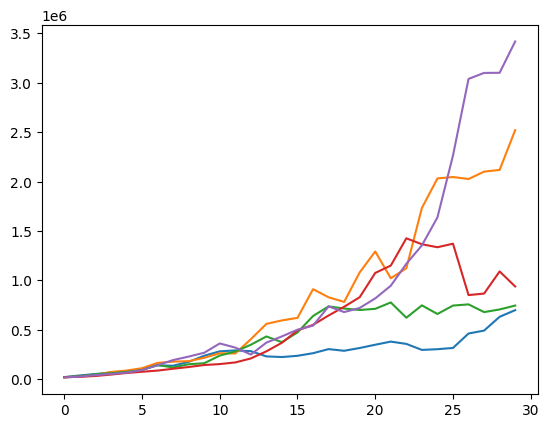

In [26]:
plt.plot(sim[first_five])

In [27]:
#summary statstics with numpy functions

print("Count", len(sim.loc[29]))
print("Mean", locale.currency(np.mean(sim.loc[29]), grouping=True))
print("SD", locale.currency(np.mean(sim.loc[29]), grouping=True))
print("Max", locale.currency(np.mean(sim.loc[29]), grouping=True))
print("Min", locale.currency(np.mean(sim.loc[29]), grouping=True))


Count 5000
Mean £1,482,783.55
SD £1,482,783.55
Max £1,482,783.55
Min £1,482,783.55


In [28]:
ending_values = sim.loc[29]
ending_values.describe()

count    5.000000e+03
mean     1.482784e+06
std      1.143838e+06
min      1.007754e+05
25%      7.523544e+05
50%      1.184416e+06
75%      1.849303e+06
max      1.657119e+07
Name: 29, dtype: float64

(array([ 41., 276., 431., 523., 521., 494., 409., 367., 306., 254., 202.,
        208., 137., 117., 108.,  76.,  81.,  49.,  57.,  48.,  35.,  31.,
         33.,  22.,  21.,  16.,   8.,  16.,  14.,  13.,   9.,  11.,   4.,
          4.,   7.,   4.,   8.,   7.,   2.,   5.,   2.,   2.,   1.,   1.,
          2.,   2.,   2.,   0.,   0.,   1.,   2.,   0.,   1.,   2.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  100775.41  ,   265479.5921,   430183.7742,   594887.9563,
          759592.1384,   924296.3205,  1089000.5026,  1253704.6847,
         1418408.8668,  1583113.0489,  1747817.231 ,  1912521.4131,
         2077225.5952,  2241929.7773,  2406633.9594,  2571338.1415,
         2736042.3236,  2900746.5057,  3065450

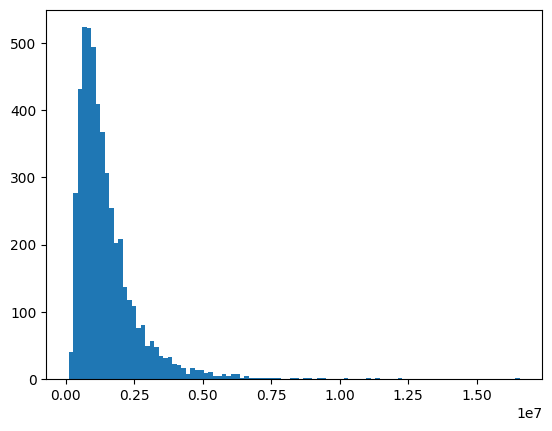

In [29]:
#get visualization of distributioin

plt.hist(ending_values, bins = 100)

In [30]:
#calculate probablity of seeing a specific ending_value or less,
#for example get close to 75%tile or 1Mil

len(ending_values[ending_values>1000000])/len(ending_values)


0.5936

In [31]:
len(ending_values[(ending_values>80000) & (ending_values<1100000)])/len(ending_values)

0.462

In [32]:
#table of percentile easy ending
p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90,95])
for p in range(len(p_tiles)):
  l = [5,10,15,25,75,85,90,95]
  print("{}%-ile:".format(l[p]).rjust(15), "{}".format(locale.currency(p_tiles[p], grouping=True)))

        5%-ile: £401,966.99
       10%-ile: £503,688.00
       15%-ile: £595,783.42
       25%-ile: £752,354.44
       75%-ile: £1,849,303.42
       85%-ile: £2,354,618.01
       90%-ile: £2,794,569.16
       95%-ile: £3,605,978.01


More pandas stuff

In [33]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [34]:
ko = yf.download("KO",start="2010-01-01", end="2020-01-01")
dpz = yf.download("DPZ",start="2010-01-01", end="2020-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
ko.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,28.580000,28.610001,28.450001,28.520000,18.351233,13870400
2010-01-05,28.424999,28.495001,28.070000,28.174999,18.129238,23172400
2010-01-06,28.174999,28.219999,27.990000,28.165001,18.122803,19264600
2010-01-07,28.165001,28.184999,27.875000,28.094999,18.077776,13234600
2010-01-08,27.730000,27.820000,27.375000,27.575001,17.743168,28712400


In [36]:
ko.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-24,54.799999,55.000000,54.639999,54.709999,47.902802,3359300
2019-12-26,54.919998,55.020000,54.790001,55.020000,48.174229,6228500
2019-12-27,55.009998,55.450001,55.000000,55.349998,48.463173,6895500
2019-12-30,55.180000,55.389999,55.060001,55.270000,48.393124,6431700
2019-12-31,55.200001,55.380001,54.980000,55.349998,48.463173,7982600


In [37]:
ko.info(), dpz.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB


(None, None)

In [38]:
ko["Open"]

Date
2010-01-04    28.580000
2010-01-05    28.424999
2010-01-06    28.174999
2010-01-07    28.165001
2010-01-08    27.730000
                ...    
2019-12-24    54.799999
2019-12-26    54.919998
2019-12-27    55.009998
2019-12-30    55.180000
2019-12-31    55.200001
Name: Open, Length: 2516, dtype: float64

In [39]:
ko.loc[:,"Open"]

Date
2010-01-04    28.580000
2010-01-05    28.424999
2010-01-06    28.174999
2010-01-07    28.165001
2010-01-08    27.730000
                ...    
2019-12-24    54.799999
2019-12-26    54.919998
2019-12-27    55.009998
2019-12-30    55.180000
2019-12-31    55.200001
Name: Open, Length: 2516, dtype: float64

In [40]:
ko.loc["2014-11-11","Open"]

42.380001068115234

In [41]:
ko.iloc[0,1]

28.610000610351562

In [42]:
ko[ko.index > "2013-01-01"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,36.990002,37.599998,36.660000,37.599998,26.398108,21872400
2013-01-03,37.450001,37.599998,37.110001,37.599998,26.398108,16357900
2013-01-04,37.650002,37.869999,37.520000,37.660000,26.440237,15311300
2013-01-07,37.520000,37.520000,37.099998,37.299999,26.187490,14610200
2013-01-08,37.189999,37.279999,36.910000,37.040001,26.004940,14324300
...,...,...,...,...,...,...
2019-12-24,54.799999,55.000000,54.639999,54.709999,47.902802,3359300
2019-12-26,54.919998,55.020000,54.790001,55.020000,48.174229,6228500
2019-12-27,55.009998,55.450001,55.000000,55.349998,48.463173,6895500


filter the criteria

In [43]:
print("Mean %.3f Std: %.3f" % (ko["Volume"].mean(), dpz["Volume"].std()))

Mean 14822298.331 Std: 611022.193


In [44]:
high = ko["Volume"].mean() + 2 * dpz["Volume"].std()

In [45]:
len(ko[ko.Volume > high])/ len(ko)

0.31279809220985694

In [46]:
#adding columns
ko["pct_chng"] = ko.Close.pct_change

In [47]:
ko.head()

,Open,High,Low,Close,Adj Close,Volume,pct_chng
Date,,,,,,,
2010-01-04,28.580000,28.610001,28.450001,28.520000,18.351233,13870400,<bound method NDFrame.pct_change of Date\n2010...
2010-01-05,28.424999,28.495001,28.070000,28.174999,18.129238,23172400,<bound method NDFrame.pct_change of Date\n2010...
2010-01-06,28.174999,28.219999,27.990000,28.165001,18.122803,19264600,<bound method NDFrame.pct_change of Date\n2010...
2010-01-07,28.165001,28.184999,27.875000,28.094999,18.077776,13234600,<bound method NDFrame.pct_change of Date\n2010...
2010-01-08,27.730000,27.820000,27.375000,27.575001,17.743168,28712400,<bound method NDFrame.pct_change of Date\n2010...


In [48]:
close = pd.DataFrame({"KO":ko.Close, "DPZ":dpz.Close})
close.head()

,KO,DPZ
Date,,
2010-01-04,28.520000,8.68
2010-01-05,28.174999,8.76
2010-01-06,28.165001,9.01
2010-01-07,28.094999,9.37
2010-01-08,27.575001,9.37


In [49]:
dpz.groupby(["Open"]).sum()

,High,Low,Close,Adj Close,Volume
Open,,,,,
8.530000,8.680000,8.410000,8.680000,7.107336,401300
8.650000,8.770000,8.510000,8.760000,7.172841,479300
8.780000,9.070000,8.760000,9.010000,7.377548,883000
9.070000,9.390000,9.030000,9.370000,7.672318,585900
9.300000,9.370000,9.120000,9.370000,7.672318,381700
...,...,...,...,...,...
298.899994,299.660004,295.950012,296.600006,279.331024,418000
299.000000,300.000000,295.440002,297.890015,280.545868,452900
300.000000,302.089996,299.290009,300.670013,283.164001,216500


<Axes: xlabel='Date'>

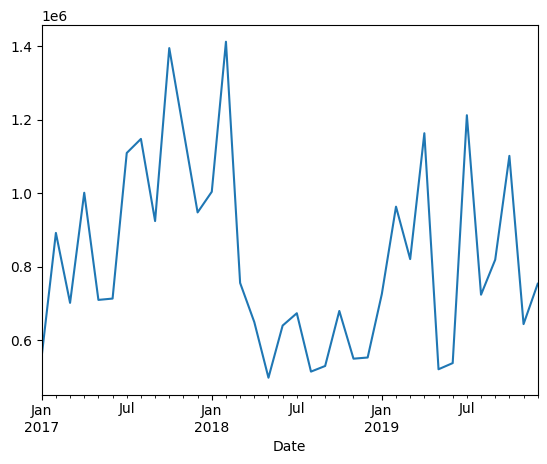

In [50]:
dpz["Volume"][dpz.index > "2017"].resample("M").mean().plot()

In [51]:
ko_change = np.log(ko.Close/ko.Close.shift(1))
dpz_change = np.log(dpz.Close/dpz.Close.shift(1))

<Axes: xlabel='Date'>

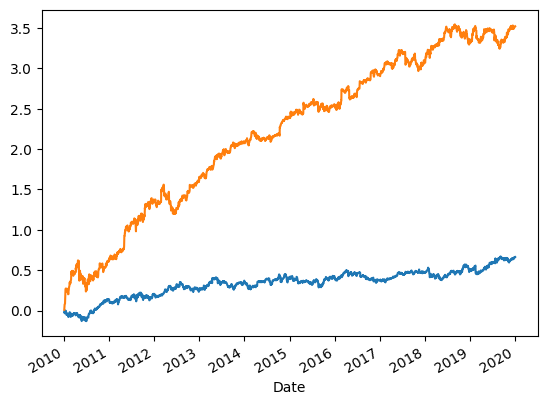

In [52]:
ko_change.cumsum().plot()
dpz_change.cumsum().plot()

In [53]:
new = pd.DataFrame({"KO":ko_change[1:], "DPZ":dpz_change[1:]})
new.to_csv("stonks.csv")

In [54]:
pd.read_csv("stonks.csv").head()

,Date,KO,DPZ
0,2010-01-05,-0.012171,0.009174
1,2010-01-06,-0.000355,0.028139
2,2010-01-07,-0.002489,0.039178
3,2010-01-08,-0.018682,0.000000
4,2010-01-11,0.020105,0.007443


In [55]:
new_stocks = pd.read_csv("stonks.csv")
new_stocks.index = new_stocks.Date
new_stocks.head()

,Date,KO,DPZ
Date,,,
2010-01-05,2010-01-05,-0.012171,0.009174
2010-01-06,2010-01-06,-0.000355,0.028139
2010-01-07,2010-01-07,-0.002489,0.039178
2010-01-08,2010-01-08,-0.018682,0.000000
2010-01-11,2010-01-11,0.020105,0.007443


In [56]:
new_stocks.rename(columns = {"KO":"New_Coke"},inplace = True)
new_stocks.head()

,Date,New_Coke,DPZ
Date,,,
2010-01-05,2010-01-05,-0.012171,0.009174
2010-01-06,2010-01-06,-0.000355,0.028139
2010-01-07,2010-01-07,-0.002489,0.039178
2010-01-08,2010-01-08,-0.018682,0.000000
2010-01-11,2010-01-11,0.020105,0.007443


In [57]:
#lets make some moving averages
cost = yf.download("COST", start="2021-06-06")
cost_close = pd.DataFrame(cost.Close)
cost_close["MA_8"] = cost_close.Close.rolling(8).mean()
cost_close["MA_21"] = cost_close.Close.rolling(21).mean()

[*********************100%***********************]  1 of 1 completed


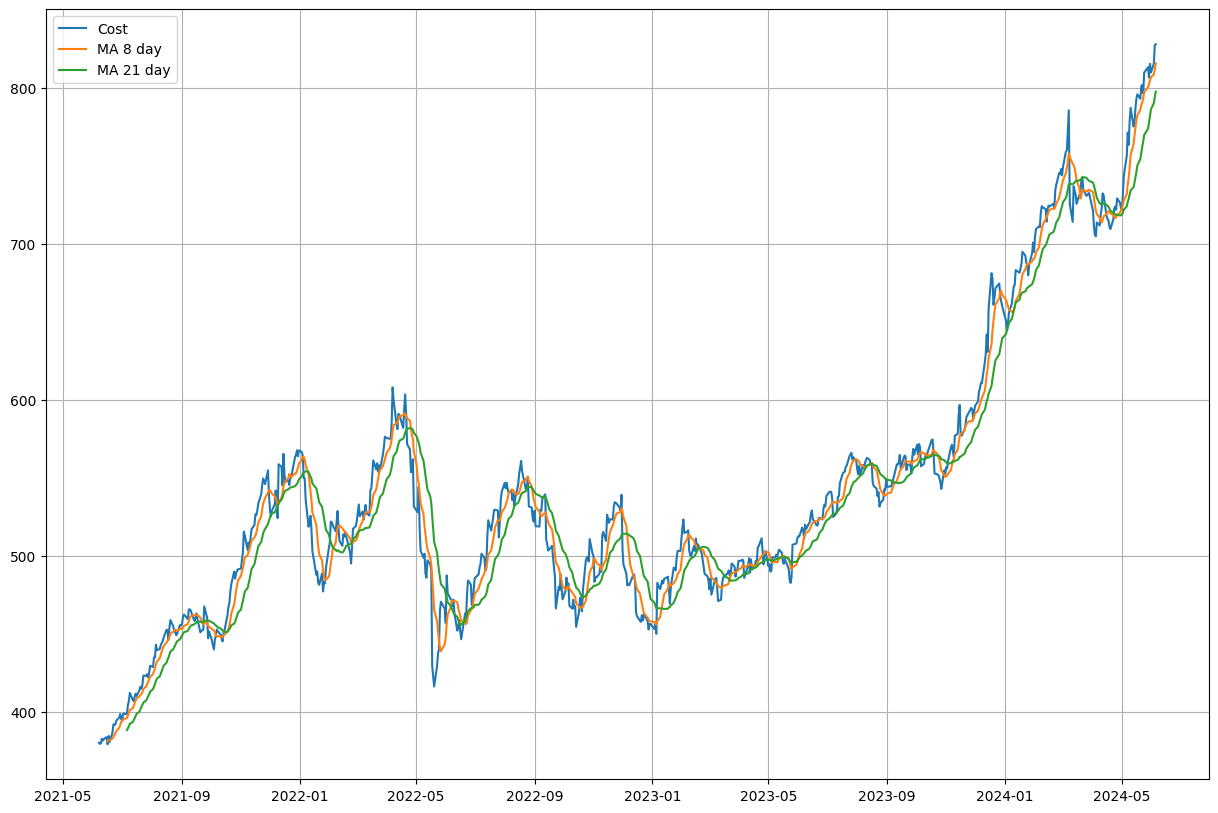

In [58]:
plt.figure(figsize = (15,10))
plt.grid(True)
plt.plot(cost_close["Close"], label="Cost")
plt.plot(cost_close["MA_8"], label = "MA 8 day")
plt.plot(cost_close["MA_21"], label = "MA 21 day")
plt.legend(loc=2)

In [59]:
cost_close["change"] = np.log(cost_close["Close"] / cost_close["Close"].shift())

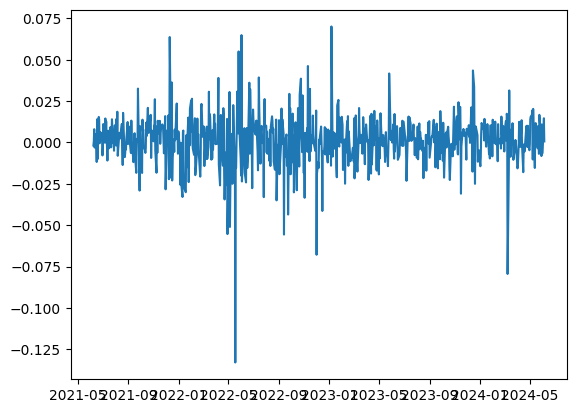

In [60]:
plt.plot(cost_close.change)

<Axes: xlabel='Date'>

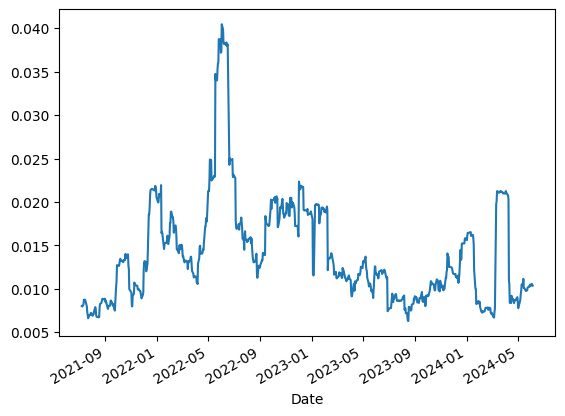

In [61]:
cost_close["Volatility"] = cost_close.change.rolling(21).std().shift()
cost_close["Volatility"].plot()

In [62]:
cost_close["actual_change"] = cost_close["Close"] - cost_close["Close"].shift(1)

In [63]:
cost_close.head()

,Close,MA_8,MA_21,change,Volatility,actual_change
Date,,,,,,
2021-06-07,380.399994,NaN,NaN,NaN,NaN,NaN
2021-06-08,379.700012,NaN,NaN,-0.001842,NaN,-0.699982
2021-06-09,379.959991,NaN,NaN,0.000684,NaN,0.259979
2021-06-10,383.010010,NaN,NaN,0.007995,NaN,3.050018
2021-06-11,381.829987,NaN,NaN,-0.003086,NaN,-1.180023


In [64]:
cost_close["exp_change"] = cost_close["Close"].shift(1) * cost_close["Volatility"]

In [65]:
cost_close.head()

,Close,MA_8,MA_21,change,Volatility,actual_change,exp_change
Date,,,,,,,
2021-06-07,380.399994,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-08,379.700012,NaN,NaN,-0.001842,NaN,-0.699982,NaN
2021-06-09,379.959991,NaN,NaN,0.000684,NaN,0.259979,NaN
2021-06-10,383.010010,NaN,NaN,0.007995,NaN,3.050018,NaN
2021-06-11,381.829987,NaN,NaN,-0.003086,NaN,-1.180023,NaN


In [66]:
cost_close = cost_close.iloc[1:]

In [67]:
cost_close["Magnitude"] = cost_close["actual_change"] / cost_close["exp_change"]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   4.,
          2.,   8.,  12.,  11.,  24.,  43.,  53.,  93., 106., 107.,  83.,
         60.,  47.,  37.,  15.,  10.,   6.,   0.,   1.,   0.,   2.,   0.,
          1.,   1.,   1.,   0.,   0.,   1.]),
 array([-9.89364829, -9.57086703, -9.24808577, -8.92530452, -8.60252326,
        -8.279742  , -7.95696075, -7.63417949, -7.31139823, -6.98861698,
        -6.66583572, -6.34305446, -6.02027321, -5.69749195, -5.37471069,
        -5.05192943, -4.72914818, -4.40636692, -4.08358566, -3.76080441,
        -3.43802315, -3.11524189, -2.79246064, -2.46967938, -2.14689812,
        -1.82411686, -1.50133561, -1.17855435, -0.85577309, -0.53299184,
        -0.21021058,  0.11257068,  0.43535193,  0.75813319,  1.08091445,
         1.4036957 ,  1.72647696,  2.04925822,  2.37203948,  2.69482073,
         3.01760199,  3.34038325,  3.6631645 ,  3.98594576,  4.30872702,
 

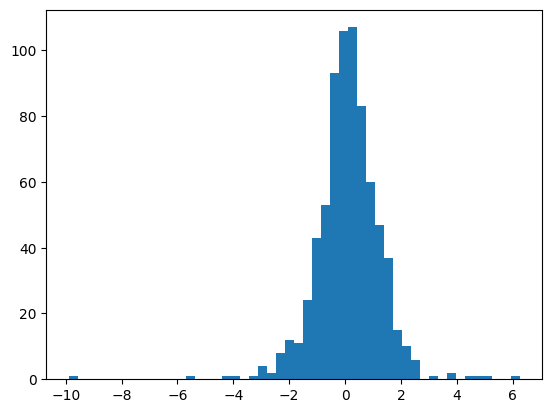

In [68]:
plt.hist(cost_close["Magnitude"], bins=50)

In [69]:
cost_close["abs_magni"] = np.abs(cost_close["Magnitude"])

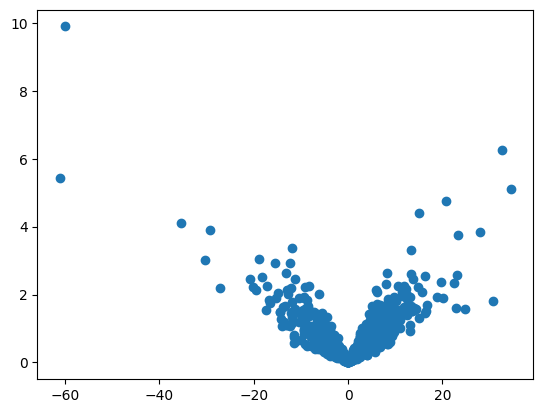

In [70]:
plt.scatter(cost_close["actual_change"], cost_close["abs_magni"])

In [72]:
import numpy as np
import pandas as pd
#import fix_yahoo_finance as fyf


In [73]:
stocks = "KO AMZN GOOG NFLX"
stocks = stocks.split()
data = yf.download(stocks, "2017-01-01")["Close"]
data.head()

[*********************100%***********************]  4 of 4 completed


,AMZN,GOOG,KO,NFLX
Date,,,,
2017-01-03,37.683498,39.306999,41.799999,127.489998
2017-01-04,37.859001,39.345001,41.650002,129.410004
2017-01-05,39.022499,39.701000,41.750000,131.809998
2017-01-06,39.799500,40.307499,41.740002,131.070007
2017-01-09,39.846001,40.332500,41.320000,130.949997


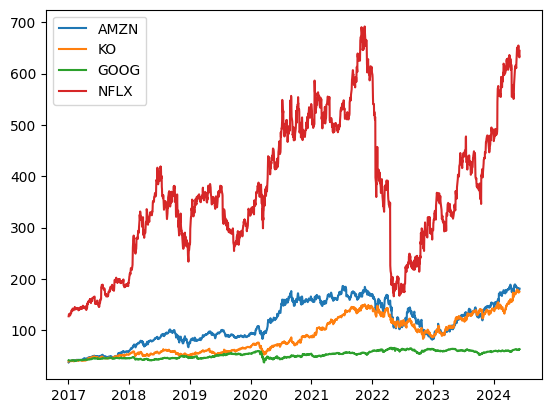

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(data)
plt.legend(["AMZN", "KO", "GOOG", "NFLX"])

In [75]:
returns = pd.DataFrame()
for stock in data:
  if stock not in returns:
    returns[stock] = np.log(data[stock]).diff()
returns.head()

,AMZN,GOOG,KO,NFLX
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,0.004646,0.000966,-0.003595,0.014948
2017-01-05,0.030270,0.009007,0.002398,0.018376
2017-01-06,0.019716,0.015161,-0.000240,-0.005630
2017-01-09,0.001168,0.000620,-0.010113,-0.000916


In [76]:
returns.describe()

,AMZN,GOOG,KO,NFLX
count,1867.000000,1866.000000,1867.000000,1867.000000
mean,0.000841,0.000801,0.000225,0.000868
std,0.020913,0.018574,0.012001,0.028002
min,-0.151398,-0.117667,-0.101728,-0.432578
25%,-0.009002,-0.007235,-0.004900,-0.011704
50%,0.001228,0.001467,0.000687,0.000686
75%,0.011283,0.010020,0.005904,0.014349
max,0.126949,0.099380,0.062783,0.155758


In [77]:
returns.corr()["AMZN"].sort_values(ascending=False)

AMZN    1.000000
GOOG    0.668285
NFLX    0.560292
KO      0.223089
Name: AMZN, dtype: float64

array([[<Axes: xlabel='AMZN', ylabel='AMZN'>,
        <Axes: xlabel='GOOG', ylabel='AMZN'>,
        <Axes: xlabel='KO', ylabel='AMZN'>,
        <Axes: xlabel='NFLX', ylabel='AMZN'>],
       [<Axes: xlabel='AMZN', ylabel='GOOG'>,
        <Axes: xlabel='GOOG', ylabel='GOOG'>,
        <Axes: xlabel='KO', ylabel='GOOG'>,
        <Axes: xlabel='NFLX', ylabel='GOOG'>],
       [<Axes: xlabel='AMZN', ylabel='KO'>,
        <Axes: xlabel='GOOG', ylabel='KO'>,
        <Axes: xlabel='KO', ylabel='KO'>,
        <Axes: xlabel='NFLX', ylabel='KO'>],
       [<Axes: xlabel='AMZN', ylabel='NFLX'>,
        <Axes: xlabel='GOOG', ylabel='NFLX'>,
        <Axes: xlabel='KO', ylabel='NFLX'>,
        <Axes: xlabel='NFLX', ylabel='NFLX'>]], dtype=object)

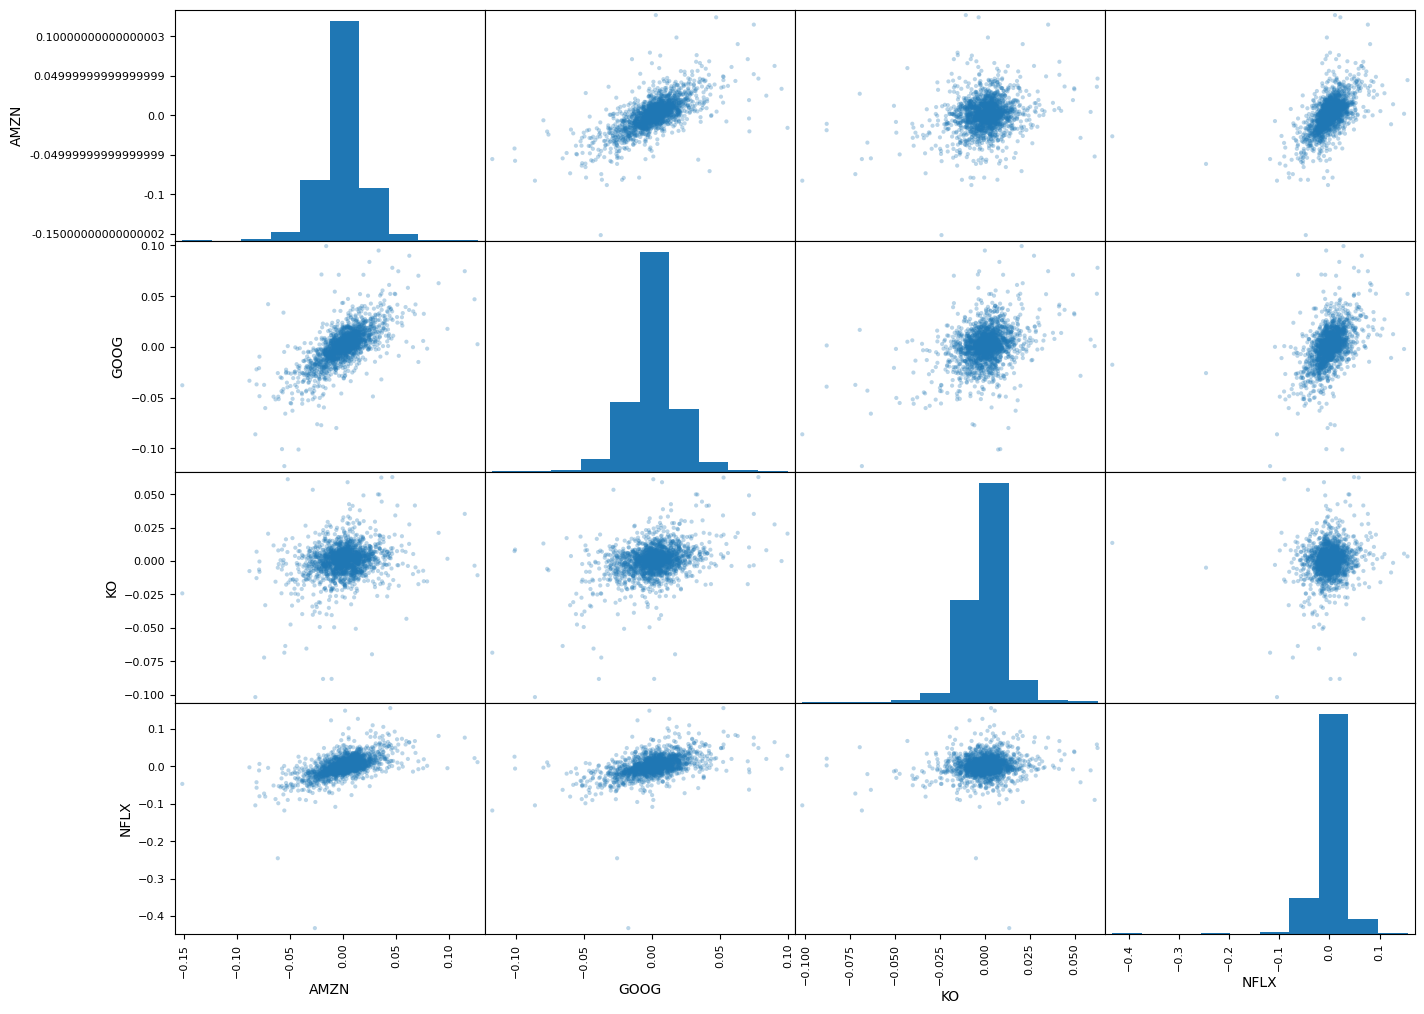

In [78]:
from pandas.plotting import scatter_matrix
scatter_matrix(returns, figsize=(16,12), alpha=0.3)

Scatter plot

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf

In [80]:
ticker = ["KO", "XLP", "WMT", "F"]

In [81]:
data = yf.download(ticker, start = "2020-01-01")

[*********************100%***********************]  4 of 4 completed


In [82]:
data.head()

Adj Close                                  Close             \
                   F         KO        WMT        XLP     F         KO   
Date                                                                     
2020-01-02  7.770412  48.147968  36.969147  55.870934  9.42  54.990002   
2020-01-03  7.597188  47.885292  36.642792  55.781513  9.21  54.689999   
2020-01-06  7.555943  47.867779  36.568192  55.897758  9.16  54.669998   
2020-01-07  7.630182  47.500042  36.229397  55.468544  9.25  54.250000   
2020-01-08  7.630182  47.587601  36.105064  55.674213  9.25  54.349998   

                                  High             ...        Low             \
                  WMT        XLP     F         KO  ...        WMT        XLP   
Date                                               ...                         
2020-01-02  39.646667  62.480000  9.42  55.430000  ...  39.566666  62.310001   
2020-01-03  39.296665  62.380001  9.37  54.990002  ...  39.196667  62.090000   
2020-01-06  39.216667  62.509998  9.17  54.910000  ...  38.923332  62.180000   
2020-01-07  38.853333  62.029999  9.25  54.599998  ...  38.733334  61.980000   
2020-01-08  38.720001  62.259998  9.30  54.639999  ...  38.560001  61.959999   

            Open                                     Volume            \
               F         KO        WMT        XLP         F        KO   
Date                                                                    
2020-01-02  9.29  55.320000  39.619999  63.099998  43425700  11867700   
2020-01-03  9.31  54.320000  39.423332  62.250000  45040800  11354500   
2020-01-06  9.10  54.650002  39.133331  62.290001  43372300  14698300   
2020-01-07  9.20  54.450001  39.086666  62.320000  44984100   9973900   
2020-01-08  9.23  54.270000  38.766666  62.080002  45994900  10676000   

                                
                 WMT       XLP  
Date                            
2020-01-02  20294700  14460700  
2020-01-03  16197600  26388900  
2020-01-06  19336500  22541700  
2020-01-07  20540700  15607600  
2020-01-08  17627400  11451400  

[5 rows x 24 columns]

In [83]:
data.Close.KO

Date
2020-01-02    54.990002
2020-01-03    54.689999
2020-01-06    54.669998
2020-01-07    54.250000
2020-01-08    54.349998
                ...    
2024-05-30    61.970001
2024-05-31    62.930000
2024-06-03    62.930000
2024-06-04    63.939999
2024-06-05    63.575001
Name: KO, Length: 1114, dtype: float64

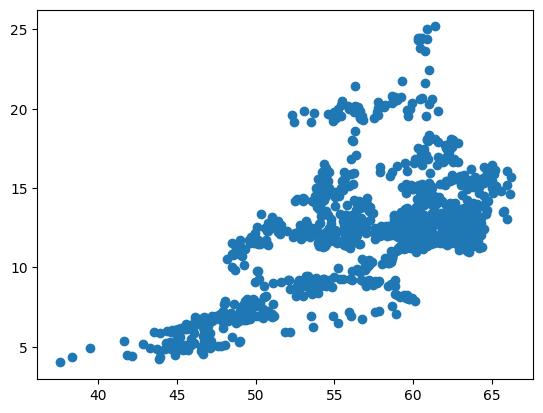

In [84]:
plt.scatter(data.Close.KO, data.Close.F)

In [85]:
returns = np.log(data).diff()
returns.head()
returns.dropna(inplace=True)

/tmp/ipykernel_2755972/70753997.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


(-0.05, 0.05)

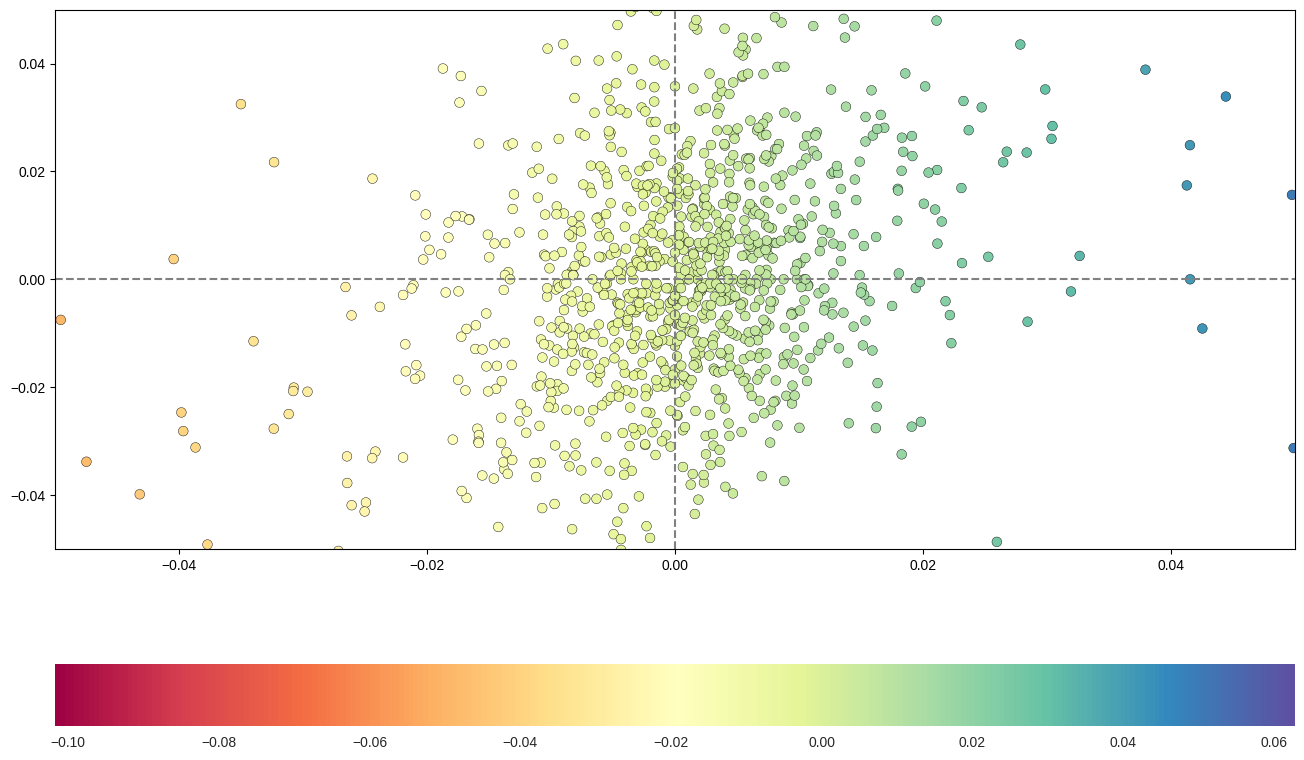

In [86]:
from matplotlib import rcParams
rcParams["figure.figsize"] = 16,10
plt.axvline(0, c=(.5, .5, .5), ls="--")
plt.axhline(0, c=(.5, .5, .5), ls="--")
plt.style.use("seaborn")
plt.scatter(returns.Close.KO, returns.Close.F, c=returns.Close.KO, cmap="Spectral",
            edgecolor="k")
plt.colorbar(orientation= "horizontal")
plt.ylim(-.05, .05)
plt.xlim(-.05, .05)

In [87]:
s = returns["KO"] = np.abs(returns.Close.KO)

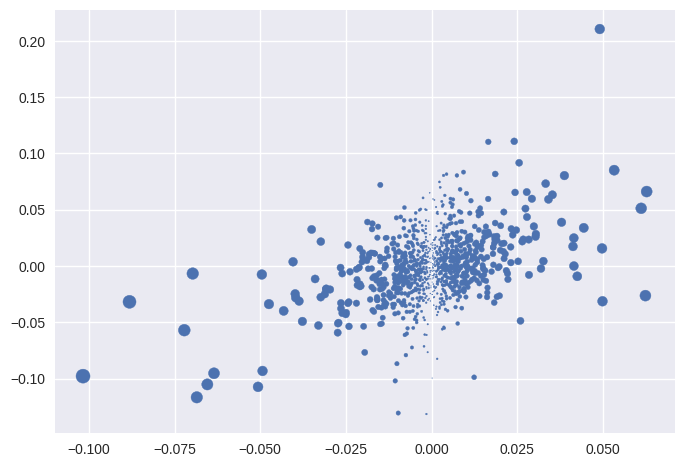

In [88]:
plt.scatter(returns.Close.KO, returns.Close.F, s = s*1000)

In [89]:
returns = np.log(data.Close).diff()
returns.head()

,F,KO,WMT,XLP
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.022545,-0.005471,-0.008867,-0.001602
2020-01-06,-0.005444,-0.000366,-0.002038,0.002082
2020-01-07,0.009777,-0.007712,-0.009308,-0.007708
2020-01-08,0.000000,0.001842,-0.003438,0.003701


In [90]:
returns.corr()

,F,KO,WMT,XLP
F,1.000000,0.415978,0.188671,0.423487
KO,0.415978,1.000000,0.407099,0.827477
WMT,0.188671,0.407099,1.000000,0.654326
XLP,0.423487,0.827477,0.654326,1.000000


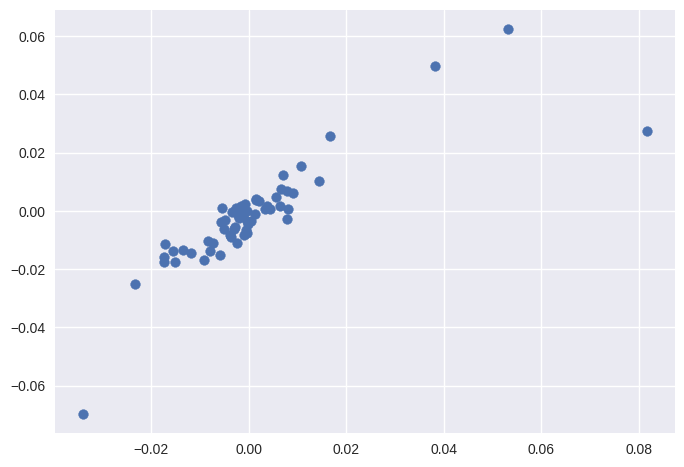

In [91]:
sample = returns.sample(60)
plt.scatter(x=sample["XLP"], y=sample["KO"])

In [92]:
reg = np.polyfit(sample["XLP"], sample["KO"], deg=1)
reg

array([ 0.868769  , -0.00231178])

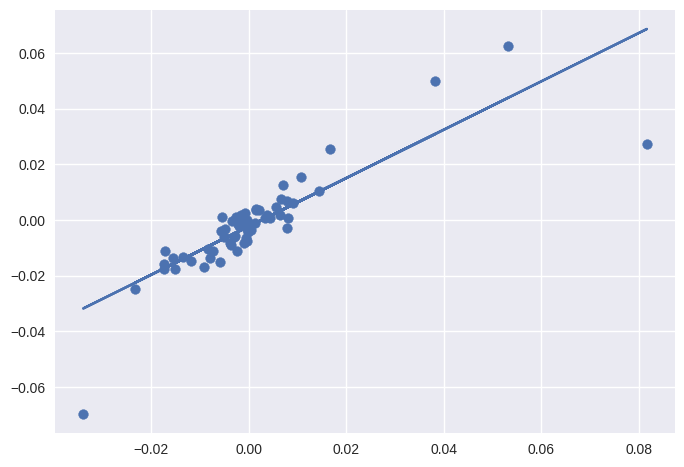

In [93]:
trend = np.polyval(reg, sample["XLP"])
plt.scatter(sample["XLP"], sample["KO"])
plt.plot(sample["XLP"], trend)

In [94]:
data = pd.DataFrame(yf.download("XLP", start="2017-01-01")["Close"])
time = np.arange(1, len(data) + 1)
data["time"] = time
data = data[["time", "Close"]]
data.tail()

[*********************100%***********************]  1 of 1 completed


,time,Close
Date,,
2024-05-30,1864,76.150002
2024-05-31,1865,77.339996
2024-06-03,1866,77.309998
2024-06-04,1867,77.980003
2024-06-05,1868,77.550003


In [95]:
reg = np.polyfit(data["time"], data["Close"], deg=1)
reg

array([1.45681607e-02, 5.06299243e+01])

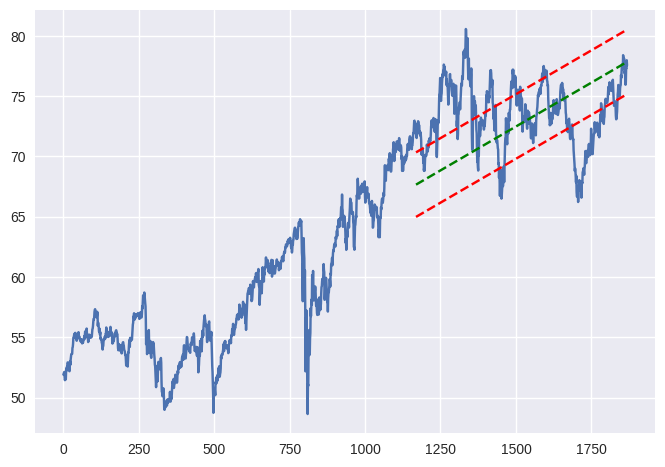

In [96]:
trend = np.polyval(reg, data["time"][-700:])
std = data["Close"][-700:].std()
plt.plot(data["time"], data["Close"], label="XLP")
plt.plot(data["time"][-700:], trend, "g--")
plt.plot(data["time"][-700:], trend - std, "r--")
plt.plot(data["time"][-700:], trend + std, "r--")

In [97]:
#peaks jääma kahe punase piiridesse 100 move
predict = np.poly1d(reg)
predict(100)

52.08674034920433

In [98]:
import seaborn as sb

<Axes: xlabel='time', ylabel='Close'>

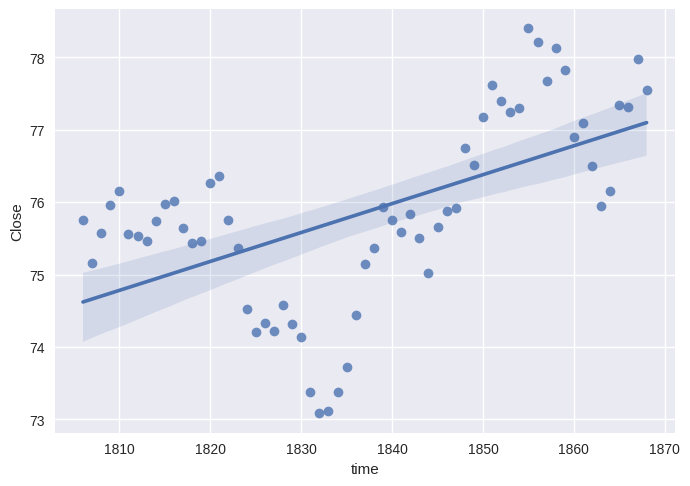

In [99]:
sb.regplot(x="time", y="Close", fit_reg=True, data = data[-63:])